# Praca domowa nr 6 Marika Partyka 14.05.2020

## Wstęp - model i dane

Do 6 pracy domowej użyłam zbioru danych z wcześniejszych prac domowych, czyli **mushrooms**. Jest to problem klasyfikacji binarnej, w której przewidujemy, czy dany grzyb będzie jadalny (1) czy nie (0). Pierwszy model to RandomForest. Wszystkie zmienne to zmienne kategoryczne, na których zastosowano transformacje *one hot encoding*.

Po takich transformacjach kolumn okazuje się, że model przewiduje w zasadzie bezbłędnie do jakiej klasy należy dany grzyb. Przedstawia to poniższa krzywa ROC.

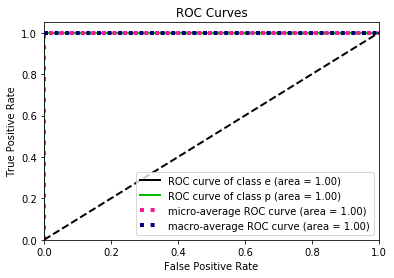

In [32]:
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

W tej prac domowej należało przetestować dwie metody wyjaśniania - **Partial dependence** i **Accumulated local dependence**. Zmiennymi skorelowanymi w tym zbiorze są na przykład **stalk-color-above-ring** i **gill-attachment**. Zobaczmy na wyniki tych dwóch metod dla modelu RandomForest.

# Partial Dependence, Accumulated - RandomForest

In [52]:
# df = pd.read_csv("/home/user/Pobrane/mushroom-classification/mushrooms.csv")
# y = df['class']
# y = np.where(y=='e', 1, 0)
# X = df.drop(["class"], inplace = False, axis = 1)
# X_new = pd.get_dummies(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#     test_size=0.2)
# rfc = Pipeline(steps=[("preprocessor", OneHotEncoder()),("classifier", RandomForestClassifier())]) 
# rfc.fit(X_train, y_train)
# # rf = RandomForestClassifier()
# # rf.fit(X_train, y_train)

# exprf = dx.Explainer(rfc, X_train, y_train, label = "Mushrooms Random Forest")

ale_num = exprf.model_profile(type = 'accumulated', variables=["bruises","gill-attachment","stalk-color-above-ring","habitat", "odor", "stalk-color-below-ring"],variable_type='categorical')
ale_num.result["_label_"] = 'ale'
pdp_num = exprf.model_profile(type = 'partial', variables=["bruises","gill-attachment","stalk-color-above-ring","habitat", "odor", "stalk-color-below-ring"],variable_type='categorical')
pdp_num.result["_label_"] = 'pdp'
pdp_num.plot(ale_num)
# cp_mary.plot()

Calculating ceteris paribus!: 100%|██████████| 22/22 [00:01<00:00, 21.40it/s]


Można zauważyć, że wykresy zmiennych, które wcześniej oznaczyliśmy jako skorelowane, są w miarę równoległe. To oznacza, że model dla tych zmiennych jest addytywny. Przy zmiennej np. **odor** nie widać takiej zależności.


# Partial Dependence, Accumulated - Logistic Regression

Teraz zmienimy model, ale kodowanie zmiennych i ilość predyktorów pozostaje taka sama.

In [53]:
ale_num = explr.model_profile(type = 'accumulated', variables=["bruises","gill-attachment","stalk-color-above-ring","habitat", "odor", "stalk-color-below-ring"],variable_type='categorical')
ale_num.result["_label_"] = 'ale'
pdp_num = explr.model_profile(type = 'partial', variables=["bruises","gill-attachment","stalk-color-above-ring","habitat", "odor", "stalk-color-below-ring"],variable_type='categorical')
pdp_num.result["_label_"] = 'pdp'
pdp_num.plot(ale_num)

Calculating ceteris paribus!: 100%|██████████| 22/22 [00:00<00:00, 54.69it/s]


Uzywając regresji logistycznej największą różnicę widać na zmiennej **odor**. Tutaj metoda accumulated location dependence wskazuje, że zmiana na wartości tej zmiennej na paramtery: *p*, *s*, *y* obniża prawdopodobieństwo tego, że grzyb jest jadalny w przeciwieństwie do modelu Random Forest.

# Variable Importance - DecisionTree

In [58]:
ale_num = expdt.model_profile(type = 'accumulated', variables=["bruises","gill-attachment","stalk-color-above-ring","habitat", "odor", "stalk-color-below-ring"],variable_type='categorical')
ale_num.result["_label_"] = 'ale'
pdp_num = expdt.model_profile(type = 'partial', variables=["bruises","gill-attachment","stalk-color-above-ring","habitat", "odor", "stalk-color-below-ring"],variable_type='categorical')
pdp_num.result["_label_"] = 'pdp'
pdp_num.plot(ale_num)

Calculating ceteris paribus!: 100%|██████████| 22/22 [00:00<00:00, 53.27it/s]


Dla Decision Tree zmienna **odor** także zachowuje się inaczej niż przy innych modelach. Teraz jednak inne wartości tego parametru obniżają prawdopodobieństwo niż w modelu z Regresją Logistyczną.

## Załącznik

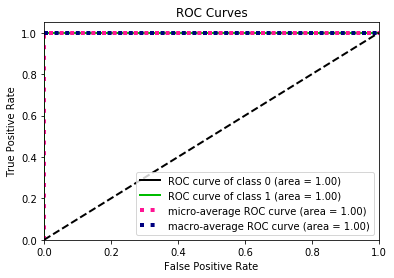

Preparation of a new explainer is initiated

  -> target variable   :  Mushrooms Random Forest
  -> data              : 6499 rows 22 cols
  -> target variable   : 6499 values
  -> predict function  : <function yhat.<locals>.<lambda> at 0x7f4d5fcc2200> will be used
  -> predicted values  : min = 0.0, mean = 0.5189859978458224, max = 1.0
  -> residual function : difference between y and yhat
  -> residuals         : min = -0.02, mean = 1.6925680873980658e-05, max = 0.040000000000000036
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> target variable   :  Mushrooms Logistic Regression
  -> data              : 6499 rows 22 cols
  -> target variable   : 6499 values
  -> predict function  : <function yhat.<locals>.<lambda> at 0x7f4d5fcc2950> will be used


Calculating ceteris paribus!:   0%|          | 0/22 [00:00<?, ?it/s]

  -> predicted values  : min = 7.089504558496599e-06, mean = 0.5190029774307335, max = 0.9999945841395034
  -> residual function : difference between y and yhat
  -> residuals         : min = -0.35738202665753765, mean = -5.390403705485932e-08, max = 0.16405901249829247
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> target variable   :  Mushrooms Decision Tree
  -> data              : 6499 rows 22 cols
  -> target variable   : 6499 values
  -> predict function  : <function yhat.<locals>.<lambda> at 0x7f4d5c924e60> will be used
  -> predicted values  : min = 0.0, mean = 0.5190029235266964, max = 1.0
  -> residual function : difference between y and yhat
  -> residuals         : min = 0.0, mean = 0.0, max = 0.0
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus!: 100%|██████████| 22/22 [00:00<00:00, 43.18it/s]


In [60]:
# import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import dalex as dx
import pandas as pd
%matplotlib inline

random.seed(123)

df = pd.read_csv("/home/user/Pobrane/mushroom-classification/mushrooms.csv")
y = df['class']
y = np.where(y=='e', 1, 0)
X = df.drop(["class"], inplace = False, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2)
rfc = Pipeline(steps=[("preprocessor", OneHotEncoder()),("classifier", RandomForestClassifier())]) 
rfc.fit(X_train, y_train)



lrc = Pipeline(steps=[("preprocessor", OneHotEncoder()),("classifier", LogisticRegression())]) 
lrc.fit(X_train, y_train)
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas_rfc = rfc.predict_proba(X_test)
# y_probas_rgb = rgb.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_true, y_probas_rfc)
plt.show()
exprf = dx.Explainer(rfc, X_train, y_train, label = "Mushrooms Random Forest")

explr = dx.Explainer(lrc, X_train, y_train, label = "Mushrooms Logistic Regression")

from sklearn.tree import DecisionTreeClassifier
dtc =  Pipeline(steps=[("preprocessor", OneHotEncoder()),("classifier", DecisionTreeClassifier())]) 
dtc.fit(X_train, y_train)

expdt = dx.Explainer(dtc, X_train, y_train, label = "Mushrooms Decision Tree")
ale_num = expdt.model_profile(type = 'accumulated', variables=["bruises","gill-attachment","stalk-color-above-ring","habitat", "odor", "stalk-color-below-ring"],variable_type='categorical')
ale_num.result["_label_"] = 'ale'
pdp_num = expdt.model_profile(type = 'partial', variables=["bruises","gill-attachment","stalk-color-above-ring","habitat", "odor", "stalk-color-below-ring"],variable_type='categorical')
pdp_num.result["_label_"] = 'pdp'
pdp_num.plot(ale_num)

